In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import tensorflow as tf


dataset_path = 'data'

classes = os.listdir(dataset_path)

num_images_per_class = 2
num_classes = len(classes)

plt.figure(figsize=(12, num_classes * 4))

for i, class_name in enumerate(classes):
    class_folder = os.path.join(dataset_path, class_name)
    images = os.listdir(class_folder)

    
    for j in range(min(num_images_per_class, len(images))):
        img_path = os.path.join(class_folder, images[j])
        img = Image.open(img_path)

        plt.subplot(num_classes, num_images_per_class, i * num_images_per_class + j + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(class_name)

plt.tight_layout()
plt.show()

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

dataset_path = "data"

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    image_size=(224, 224), 
    batch_size=32
)

# Stampare le classi
class_names = train_ds.class_names
print(class_names)

Found 14624 files belonging to 47 classes.
['African Violet (Saintpaulia ionantha)', 'Aloe Vera', 'Anthurium (Anthurium andraeanum)', 'Areca Palm (Dypsis lutescens)', 'Asparagus Fern (Asparagus setaceus)', 'Begonia (Begonia spp.)', 'Bird of Paradise (Strelitzia reginae)', 'Birds Nest Fern (Asplenium nidus)', 'Boston Fern (Nephrolepis exaltata)', 'Calathea', 'Cast Iron Plant (Aspidistra elatior)', 'Chinese Money Plant (Pilea peperomioides)', 'Chinese evergreen (Aglaonema)', 'Christmas Cactus (Schlumbergera bridgesii)', 'Chrysanthemum', 'Ctenanthe', 'Daffodils (Narcissus spp.)', 'Dracaena', 'Dumb Cane (Dieffenbachia spp.)', 'Elephant Ear (Alocasia spp.)', 'English Ivy (Hedera helix)', 'Hyacinth (Hyacinthus orientalis)', 'Iron Cross begonia (Begonia masoniana)', 'Jade plant (Crassula ovata)', 'Kalanchoe', 'Lilium (Hemerocallis)', 'Lily of the valley (Convallaria majalis)', 'Money Tree (Pachira aquatica)', 'Monstera Deliciosa (Monstera deliciosa)', 'Orchid', 'Parlor Palm (Chamaedorea elega

In [10]:
# Caricamento delle immagini
img_height, img_width = 224, 224
batch_size = 32

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,            # Normalizzazione dei pixel tra 0 e 1
    rotation_range=30,         # Rotazione casuale fino a 30 gradi
    width_shift_range=0.2,     # Traslazione orizzontale fino al 20%
    height_shift_range=0.2,    # Traslazione verticale fino al 20%
    shear_range=0.2,           # Trasformazione affine (shear)
    zoom_range=0.2,            # Zoom fino al 20%
    horizontal_flip=True,      # Specchiatura orizzontale
    fill_mode='nearest',       # Riempimento dei pixel mancanti
    validation_split=0.2       # Suddivisione tra training e validation
)


train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 11715 images belonging to 47 classes.
Found 2905 images belonging to 47 classes.


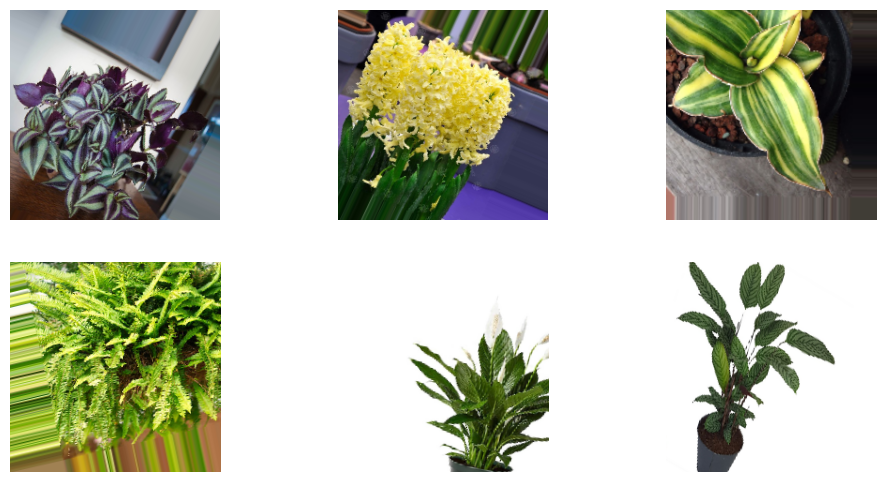

In [11]:
# Visualizzazione dati aumentati

import matplotlib.pyplot as plt
import numpy as np

# Preleva un batch di immagini dal generatore
images, labels = next(train_generator)  # Prende un batch di immagini casuali

# Numero di immagini da mostrare
num_images = 6  

plt.figure(figsize=(12, 6))

for i in range(num_images):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i])  
    plt.axis('off')

plt.show()

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import MobileNetV2

# Carica il modello pre-addestrato senza il top classifier
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congela i pesi del modello pre-addestrato
base_model.trainable = False  

# Costruisci il modello personalizzato
model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(len(train_generator.class_indices), activation='softmax')  # Numero di classi
])

# Compilazione del modello
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Addestramento
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=5  
)

# Salvataggio del modello
model.save("modello_piante.h5")


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/Users/gmariani003/Desktop/Personal/PlantDiscovery/env/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
 32/367 ━━━━━━━━━━━━━━━━━━━━ 2:45 494ms/step - accuracy: 0.0534 - loss: 3.9421

/Users/gmariani003/Desktop/Personal/PlantDiscovery/env/lib/python3.10/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


367/367 ━━━━━━━━━━━━━━━━━━━━ 221s 598ms/step - accuracy: 0.2133 - loss: 3.0798 - val_accuracy: 0.5635 - val_loss: 1.6430
Epoch 2/5
367/367 ━━━━━━━━━━━━━━━━━━━━ 222s 606ms/step - accuracy: 0.5022 - loss: 1.7639 - val_accuracy: 0.6155 - val_loss: 1.3727
Epoch 3/5
367/367 ━━━━━━━━━━━━━━━━━━━━ 225s 612ms/step - accuracy: 0.5671 - loss: 1.5056 - val_accuracy: 0.6282 - val_loss: 1.2921
Epoch 4/5
367/367 ━━━━━━━━━━━━━━━━━━━━ 225s 612ms/step - accuracy: 0.6006 - loss: 1.3902 - val_accuracy: 0.6654 - val_loss: 1.1904
Epoch 5/5
367/367 ━━━━━━━━━━━━━━━━━━━━ 223s 607ms/step - accuracy: 0.6182 - loss: 1.3274 - val_accuracy: 0.6671 - val_loss: 1.1481


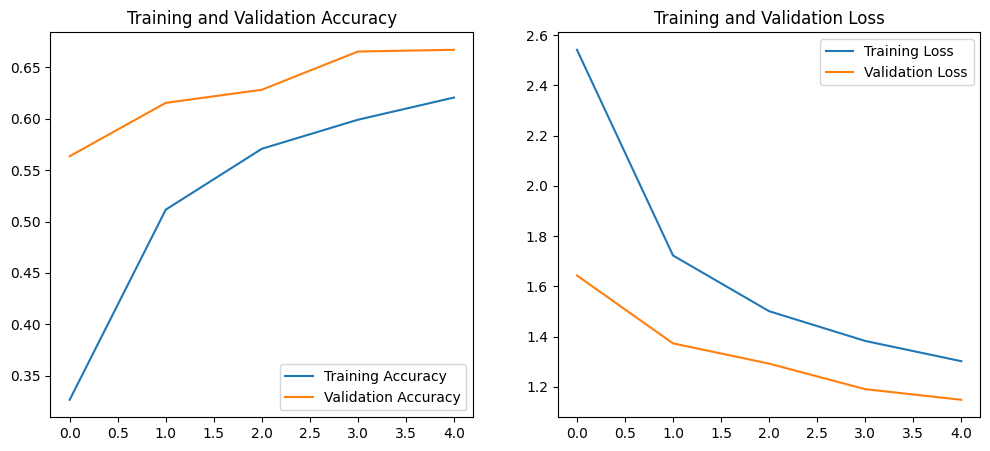

In [13]:
import matplotlib.pyplot as plt

# Estrai i dati dal training
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

# Plot accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()
